# MiBiPreT example: Ordination with Amersfoort data

Diagnostic plots for data analysis on microbial biodegredation at the contaminant Amersfoort site. Author: Alraune Zech

Data based on the PhD thesis of *Johan van Leeuwen*, 2021 'Biodegredation of mono- and polyaromatic hydrocarbons in a contaminated aquifer originating from a former Pintsch gas factory site' which is equivalent to the manuscript of van Leeuwen et al., 2022 'Anaerobic degradation of benzene and other aromatic hydrocarbons in a tar-derived plume: Nitrate versus iron reducing conditions', J. of Cont. Hydrol. The data was provided by Johan van Leeuwen.
  
## Background: Amersfoort contaminant site

Close to the train station in Amersfoort, the Netherlands, the subsurface is contaminated with organic hydrocarbons forming a NAPL. Contamination originates from decades of operating manufactured gas plant, which dumped tar by-products in waste lagoons. The tar is a DNAPL and has spread into the underlying shallow unconfined aquifer. Sample wells were installed to measure various characteristics of the subsurface. The raw data contains measurements on
* environmental conditions, such as pH, redox potential, concentrations of oxygen, nitrate, etc
* contaminant concentration such as BTEX, indene, indane, naphtalene and multiple other (typically cyclic) petroleum hydrocarbons
* metabolite concentration, i.e. byproducts of degredation processes of contaminant
* isotope measurments for specific contaminants and samples
* counts of genes (RNA/DNA) of mibrobiota that is know to perform biodegredation as well as functional enzymes know to be responsible for biodegredation

**Required packages**

In [2]:
from mibipret.data.load_data import load_excel
from mibipret.data.check_data import standardize, standard_names
from mibipret.data.set_data import merge_data, extract_data

from mibipret.analysis.reduction.transformation import filter_values,transform_values
from mibipret.analysis.reduction.ordination import pca
from mibipret.visualize.ordination_plot import ordination_plot

# import sys
# path = '/home/alraune/GitHub/MiBiPreT/mibipret/mibipret/analysis/reduction'
# sys.path.append(path) # append the path to module
# from transformation import filter_values,transform_values
# from ordination import pca

# path = '/home/alraune/GitHub/MiBiPreT/mibipret/mibipret/data'
# sys.path.append(path) # append the path to module
# from set_data import merge_data, extract_data

# path = '/home/alraune/GitHub/MiBiPreT/mibipret/mibipret/visualize'
# sys.path.append(path) # append the path to module
# from ordination_plot import ordination_plot


## Analysis

### Data loading

In [3]:
file_path = './amersfoort.xlsx'

Load and standardize data of environmental quantities/chemicals

In [4]:
environment_raw,units = load_excel(file_path,
                                    sheet_name = 'environment',
                                    verbose = False)

environment,units = standardize(environment_raw,
                                reduce = True,
                                verbose=False)

#display(environment)

________________________________________________________________
________________________________________________________________
________________________________________________________________


Load and standardize data of contaminants:

In [5]:
contaminants_raw,units = load_excel(file_path,
                                    sheet_name = 'contaminants',
                                    verbose = False)

contaminants,units = standardize(contaminants_raw,
                                  reduce = False,
                                  verbose = False)
#display(contaminants)

________________________________________________________________
________________________________________________________________
________________________________________________________________


Merge both data frames into one for further analysis:

In [6]:
data = merge_data([environment,contaminants],clean = True)
#display(data)

### Data pre-processing

Specification of variables to chose for ordination. We make sure that variables selected for analysis are in standard names.

In [7]:
variables_1 = standard_names(['Sum GC'])
variables_2 = standard_names(['nitrate','pH','nitrite','sulfate','Redox','EC','DOC',"Mn","Fe"])

Extracting data of interest from data frame. All other quantities are removed, since only columns of interest should be passed to ordination analysis routines. 

In [8]:
data_ordination = extract_data(data,
                               name_list = variables_1 + variables_2,
                               keep_setting_data = True)

Cleaning data, i.e. remove all sites where measurements are missing for any of the quantities

In [9]:
data_filtered = filter_values(data_ordination, 
              replace_NaN = 'remove', 
              inplace = True,
              verbose = True)
# display(data_filtered)

Perform filtering of values since ordination requires all values to be numeric.
The sample row(s) have been removed since they contain NaN values: [19]


### Data transformation

Concentrations of contaminants (`Sum GC`) is log-transformed (given that concentration vary over orders of magnitude) and then standardized.
Other data is only standardized.

In [10]:
data_transformed = transform_values(data_ordination,
                 name_list = variables_1,
                 how = 'log_scale',
                 inplace = True,
                 )

data_transformed = transform_values(data_ordination,
                  name_list = variables_1,
                  how = 'standardize',
                  inplace = True,
                  )

data_transformed = transform_values(data_ordination,
                  name_list = variables_2,
                  how = 'standardize',
                  inplace = True,
                )
display(data_transformed)

,depth,sample_nr,obs_well,redoxpot,DOC,pH,EC,Sum GC,nitrate,nitrite,manganese,iron2,sulfate
0,15-16,1024(16),1024,0.555275,-0.683686,0.450269,1.390889,-1.583575,0.763911,0.587911,-0.436852,-0.893917,-0.206364
1,21-22,1033(22),1033,-1.664580,-0.583226,1.726979,0.994335,-1.583575,-0.304822,-0.460329,-0.308922,1.862104,-0.749129
2,15-16,241(16),241,0.794183,-0.348819,-0.826442,0.371179,-1.253701,-0.050362,-0.267232,-0.390332,-0.625098,-0.115903
3,20-21,241(21),241,-0.539721,-0.315333,0.267881,0.150871,0.612042,2.087103,2.160271,-0.367072,2.741417,-0.749129
4,29-30,241(30),241,-0.420267,-0.125575,0.085494,-0.201621,0.501658,0.458558,0.174132,-0.080199,0.706434,-0.749129
5,35-36,241(36),241,1.271999,-0.237197,-1.191217,0.056454,-1.615211,1.713895,1.663736,-0.421346,-0.873818,2.055157
6,20-21,320(21),320,-1.525217,-0.449279,2.091754,3.096699,-1.482545,2.104067,2.325783,-0.277909,0.178846,2.869305
7,20-21,323(21),323,-1.077264,-0.694848,1.544592,1.239821,-1.615211,0.187134,-0.046550,-0.332182,-0.574851,0.336401
8,8-9,323(9),323,1.291909,-0.170224,-1.008830,-0.126087,-1.583575,1.103191,0.781008,-0.390332,-0.891404,2.417000
9,8-9,352(9),352,1.570635,-0.460441,-1.555991,-0.711476,0.191875,1.120155,2.187856,-0.378702,-0.891404,1.421931


### Ordination analysis by PCA

In [11]:
ordination_output = pca(data_ordination,
                        independent_variables = variables_1+variables_2,
                        verbose = True)

 Running function 'pca()' on data
Information about the success of the PCA:
----------------------------------------------------------------
Principle component 0 explains 32.15% of the total variance.
Principle component 1 explains 24.3% of the total variance.
Principle component 2 explains 14.18% of the total variance.
Principle component 3 explains 10.19% of the total variance.
Principle component 4 explains 7.79% of the total variance.
Principle component 5 explains 4.74% of the total variance.
Principle component 6 explains 3.44% of the total variance.
Principle component 7 explains 2.33% of the total variance.
Principle component 8 explains 0.6% of the total variance.
Principle component 9 explains 0.28% of the total variance.

The correlation coefficient between PC1 and PC2 is -5.0222e-16.
----------------------------------------------------------------


### Ordination plot

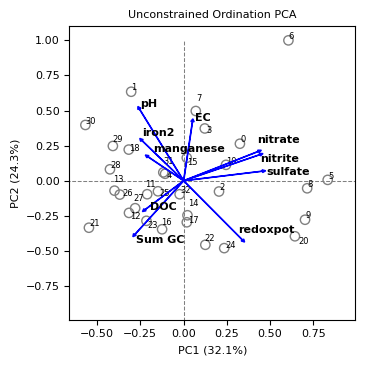

In [12]:
fig, ax = ordination_plot(ordination_output=ordination_output,
                plot_scores = True, 
                plot_loadings = True,
                rescale_loadings_scores = True, 
                title = "Unconstrained Ordination PCA",                
                # plot_scores = False, 
                # axis_ranges = [-0.6,0.8,-0.8,1.0],
                # save_fig = 'ordination_amersfoort.png',
                )

### Interpretation

The figure shows the results of the PCA (principle component analysis) as multi-variate statistics tool for the geochemical parameters. The axes denote the percentage of variance explained by each principal component. Data was standardized, with `Sum GC` (being the total sum of contaminants) being logarithmically transformed as via $log(x+1)$.

This biplot shows two different elements of information: the variable loadings show as arrows and the site scores shown as dots. The two plot axis represent the two main axis identified by the ordination methods. They are scales to the minimal value of $-1$ and the maximum value of $1$. 

The direction of the arrow indicates to which ordination axis it correlates. The length of the vector is equivalent to the extent of that correlation. Positive scores or loadings indicate positive correlation with the axis, where negative values indicate negative 
correlation. For example, a variable with negative loadings for the first two ordination axes is anticorrelated with the two largest trends in the data. Arrows pointing in the same direction indicate that the variable are correlated. Arrows at an right angle to one another are uncorrelated. Arrows that point in opposite directions are anti-correlated. A vector very close to the origin shows little to no correlation with the axes. 

Proximity of the site scores in the plot indicate the similarity between the sample sites. 